In [1]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
import SPACEL
from SPACEL import Splane

In [3]:
adata = sc.read('D:\pythonplaces\deconv-mulST\Baseline\Spoint\Result\Dataset4\st.h5ad')
adata

AnnData object with n_obs × n_vars = 10544 × 1403
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'Pathologist Annotations', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'CMS2', 'CD4+ T cells', 'CD8+ T cells', 'CMS3', 'CD19+CD20+ B', 'IgA+ Plasma', 'SPP1+', 'Regulatory T cells', 'Pro-inflammatory', 'Unknown', 'T helper 17 cells', 'IgG+ Plasma', 'CMS1', 'Myofibroblasts', 'NK cells', 'Stromal 1', 'gamma delta T cells', 'Tip-like ECs', 'Stromal 3', 'T follicular helper cells', 'cDC', 'Pericytes', 'Stalk-like ECs', 'Stem-like/TA', 'Stromal 2', 'Enteric glial cells', 'Smooth muscle cells', 'Mature Enterocytes type 1', 'Mast cells', 'Intermediate', 'Proliferating', 'Goblet cells', 'Mature Enterocytes type 2', 'Lymphatic ECs', 'Proliferative ECs', 'CMS4'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltypes', 'hvg'
    obsm: 'spatial'
    layers: 'norm'

In [4]:
adata.uns['celltypes']

array(['CMS2', 'CD4+ T cells', 'CD8+ T cells', 'CMS3', 'CD19+CD20+ B',
       'IgA+ Plasma', 'SPP1+', 'Regulatory T cells', 'Pro-inflammatory',
       'Unknown', 'T helper 17 cells', 'IgG+ Plasma', 'CMS1',
       'Myofibroblasts', 'NK cells', 'Stromal 1', 'gamma delta T cells',
       'Tip-like ECs', 'Stromal 3', 'T follicular helper cells', 'cDC',
       'Pericytes', 'Stalk-like ECs', 'Stem-like/TA', 'Stromal 2',
       'Enteric glial cells', 'Smooth muscle cells',
       'Mature Enterocytes type 1', 'Mast cells', 'Intermediate',
       'Proliferating', 'Goblet cells', 'Mature Enterocytes type 2',
       'Lymphatic ECs', 'Proliferative ECs', 'CMS4'], dtype=object)

In [5]:
adata.obs['batch_name_new'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [6]:

section_ids = [1,2,3,4,5,6,7]
adata_list = []

for idx, sid in enumerate(section_ids):
    sub_adata = adata[adata.obs['batch_name_new'] == sid]
    adata_list.append(sub_adata)

adata_list


[View of AnnData object with n_obs × n_vars = 2203 × 1403
     obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'Pathologist Annotations', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'CMS2', 'CD4+ T cells', 'CD8+ T cells', 'CMS3', 'CD19+CD20+ B', 'IgA+ Plasma', 'SPP1+', 'Regulatory T cells', 'Pro-inflammatory', 'Unknown', 'T helper 17 cells', 'IgG+ Plasma', 'CMS1', 'Myofibroblasts', 'NK cells', 'Stromal 1', 'gamma delta T cells', 'Tip-like ECs', 'Stromal 3', 'T follicular helper cells', 'cDC', 'Pericytes', 'Stalk-like ECs', 'Stem-like/TA', 'Stromal 2', 'Enteric glial cells', 'Smooth muscle cells', 'Mature Enterocytes type 1', 'Mast cells', 'Intermediate', 'Proliferating', 'Goblet cells', 'Mature Enterocytes type 2', 'Lymphatic ECs', 'Proliferative ECs', 'CMS4'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'celltypes', 'hvg'
     obsm: 'spatial'
     layers: 'norm',
 View of AnnData object

In [7]:
import importlib
import base_model

importlib.reload(base_model)
splane_model = Splane.init_model(adata_list, n_clusters=4,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5) 
splane_model.train(d_l=0.5)
splane_model.identify_spatial_domain()

Setting global seed: 42
Calculating cell type weights...
Generating GNN inputs...
Calculating largest eigenvalue of normalized graph Laplacian...
Calculating Chebyshev polynomials up to order 1...
Setting the weight of similarity loss to 3.166


The best epoch 10 total loss=-4.329 g loss=-3.406 d loss=1.847 d acc=0.492 simi loss=-0.992 db loss=0.444:  22%|██▏       | 65/300 [00:08<00:32,  7.26it/s]

Stop trainning because of loss convergence


In [2]:
stdata=sc.read_h5ad('D:\pythonplaces\SPACEL-main\SPACEL\Splane\Result\dataset4/dataset4_st1.h5ad')
stdata

AnnData object with n_obs × n_vars = 10544 × 1403
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'Pathologist Annotations', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'CMS2', 'CD4+ T cells', 'CD8+ T cells', 'CMS3', 'CD19+CD20+ B', 'IgA+ Plasma', 'SPP1+', 'Regulatory T cells', 'Pro-inflammatory', 'Unknown', 'T helper 17 cells', 'IgG+ Plasma', 'CMS1', 'Myofibroblasts', 'NK cells', 'Stromal 1', 'gamma delta T cells', 'Tip-like ECs', 'Stromal 3', 'T follicular helper cells', 'cDC', 'Pericytes', 'Stalk-like ECs', 'Stem-like/TA', 'Stromal 2', 'Enteric glial cells', 'Smooth muscle cells', 'Mature Enterocytes type 1', 'Mast cells', 'Intermediate', 'Proliferating', 'Goblet cells', 'Mature Enterocytes type 2', 'Lymphatic ECs', 'Proliferative ECs', 'CMS4', 'spatial_domain'
    obsm: 'spatial'
    layers: 'norm'

D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\Spoint\lib\site-packages\sca

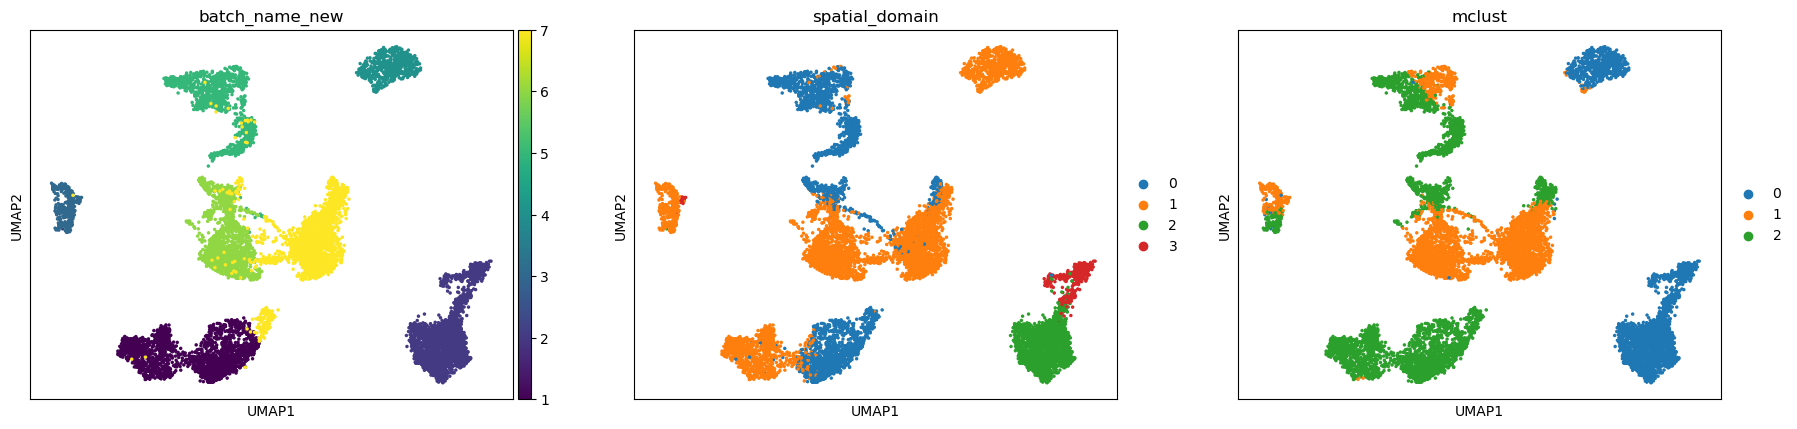

In [3]:
import anndata as ad
import numpy as np
from sklearn.cluster import KMeans
def Kmeans_cluster(adata, num_cluster,  key_added_pred="G3STNET", random_seed=2024):
    np.random.seed(random_seed)
    cluster_model = KMeans(n_clusters=num_cluster, init='k-means++', n_init=100, max_iter=1000, tol=1e-6)
    cluster_labels = cluster_model.fit_predict(adata.X)
    adata.obs[key_added_pred] = cluster_labels
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('int')
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('category')
    return adata
adata_clu = Kmeans_cluster(stdata, num_cluster=4,  key_added_pred='mclust', random_seed=42)
sub_adata_tmp=adata_clu
sub_adata_tmp.obsm['latent_no_batch']=adata_clu.X
sc.pp.neighbors(sub_adata_tmp, use_rep='latent_no_batch', metric='cosine')
sc.tl.umap(sub_adata_tmp)
sc.pl.umap(sub_adata_tmp, color=['batch_name_new','spatial_domain','mclust'], show=True, size=25, save=False)

In [4]:
sub_adata_tmp.write_h5ad('D:\pythonplaces\SPACEL-main\SPACEL\Splane\Result\dataset4\dataset4_cluster.h5ad')